In [54]:
#imports
import pandas as pd 
import plotly as pl
import plotly.express as px
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [33]:
# TASK 1 : import dataset
DATA = pd.read_csv("mammographic_masses_data.csv")


In [34]:
# TASK 2 : plot the data (//nog niet klaar)

y = DATA['Age']
x = DATA['Density']

fig1 = px.line(x=x, y=y, labels={'x': 'Age', 'y': 'Density'}, title='Age plotted against Denisty')
fig1.show()


density_average =  DATA.groupby('BA', as_index=False)['Density'].mean()

barfig1 = px.bar(density_average, x='BA', y='Density', labels={'Density': 'Average Density'}, title='Average Density per BA')
barfig1.show()


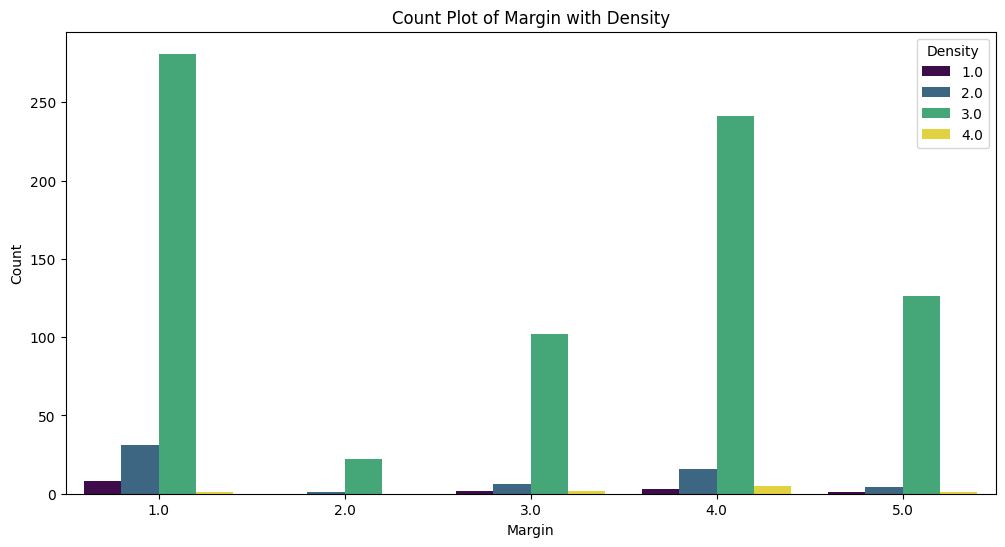

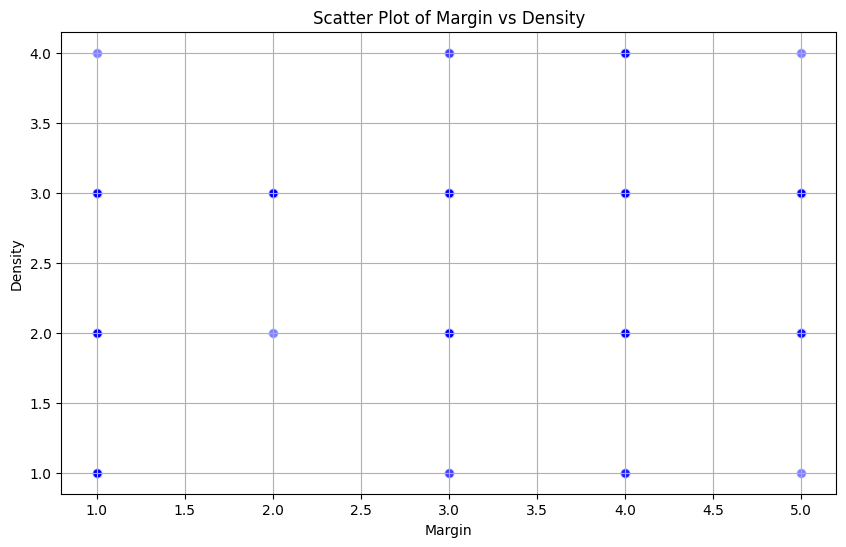

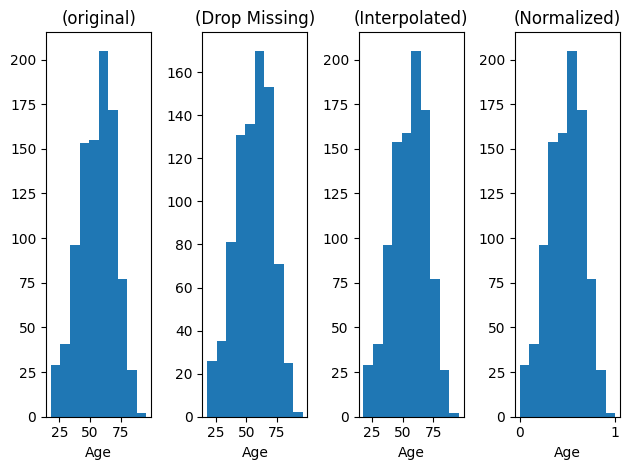

In [55]:
# TASK 3 : data preprocessing
cDATA = DATA.copy()

plt.figure(figsize=(12, 6))
sns.countplot(data=DATA, x='Margin', hue='Density', palette='viridis')
plt.title('Count Plot of Margin with Density')
plt.xlabel('Margin')
plt.ylabel('Count')
plt.legend(title='Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(DATA['Margin'], DATA['Density'], alpha=0.5, color='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Margin vs Density')
plt.xlabel('Margin')
plt.ylabel('Density')
plt.grid(True)
plt.show()

sns.pairplot(DATA[['Margin', 'Density']])
plt.title('Pair Plot of Margin and Density')
plt.show()  

# Aggregate data
agg_data = DATA.groupby('Margin')['Density'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
plt.bar(agg_data['Margin'], agg_data['Density'], color='blue')
plt.title('Average Density for Each Margin')
plt.xlabel('Margin')
plt.ylabel('Average Density')
plt.show()

# TASK 3.1
fig, plot = plt.subplots(1, 4)
plot[0].hist(cDATA["Age"])
plot[0].set_title("(original)")
plot[0].set_xlabel("Age")

dropMissing = cDATA.dropna()

plot[1].hist(dropMissing["Age"])
plot[1].set_title("(Drop Missing)")
plot[1].set_xlabel("Age")

# CLEANING : fill missing values using the most probable value using linear interpolation
for column in cDATA.columns.to_list():
    cDATA[column].interpolate(method='linear', inplace=True)

plot[2].hist(cDATA["Age"])
plot[2].set_title("(Interpolated)")
plot[2].set_xlabel("Age")


# TASK 3.2
# NORMALIZATION : min-max normalization on the Age column
cDATA['Age'] = (cDATA['Age'] - cDATA['Age'].min()) / (cDATA['Age'].max() - cDATA['Age'].min()) 
# we could also use normalization on ordinal parameters such as BA and Density
do_normalize_ordinal = False
for column in ["Density"]:
    if do_normalize_ordinal: cDATA[column] = (cDATA[column] - cDATA[column].min()) /(cDATA[column].max() - cDATA[column].min())


plot[3].hist(cDATA["Age"])
plot[3].set_title("(Normalized)")
plot[3].set_xlabel("Age")

plt.tight_layout()
plt.show()



In [39]:
# TASK 4 : data feature engineering (//nog niet klaar)

# TASK 4.1
# AUTOMATIC FEATURE SELECTION : using univariate feature selection (for a classification problem)
y = cDATA["BA"]
features = ["Age", "Shape", "Margin", "Density", "Severity"]
x = cDATA[features]

make_selection = SelectKBest(score_func=f_classif, k=3)
new_x = make_selection.fit_transform(x, y)

selected_feature_mask = x.columns[make_selection.get_support()]
print(selected_feature_mask)




Index(['Shape', 'Margin', 'Severity'], dtype='object')
